In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

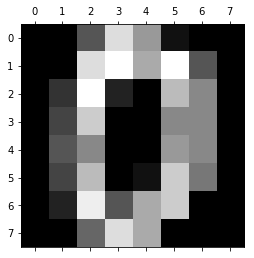

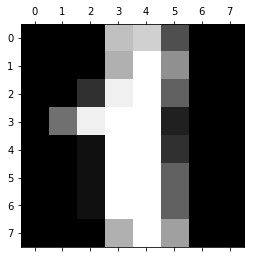

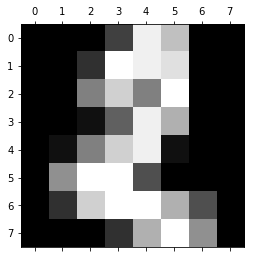

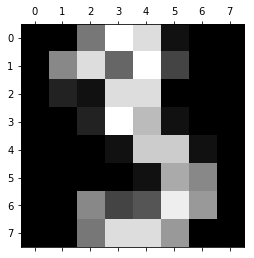

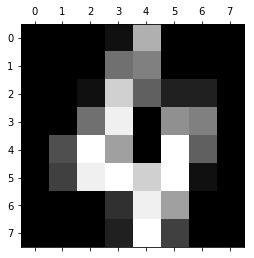

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [6]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [30]:
df['target']=digits.target
df[65:70]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
65,0.0,0.0,0.0,9.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,12.0,14.0,9.0,0.0,6
66,0.0,0.0,0.0,10.0,11.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,15.0,12.0,5.0,0.0,6
67,0.0,0.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,14.0,16.0,12.0,7.0,0.0,6
68,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,16.0,5.0,0.0,0.0,4
69,0.0,0.0,6.0,12.0,13.0,6.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,6.0,11.0,0.0,0.0,0.0,0.0,9


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['target'],axis='columns'),df['target'],test_size=0.2)


In [25]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=300)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
model.score(x_test,y_test)

0.975

In [27]:
y_pred=model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[28,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 44]], dtype=int64)

Text(69.0, 0.5, 'Predicted Value')

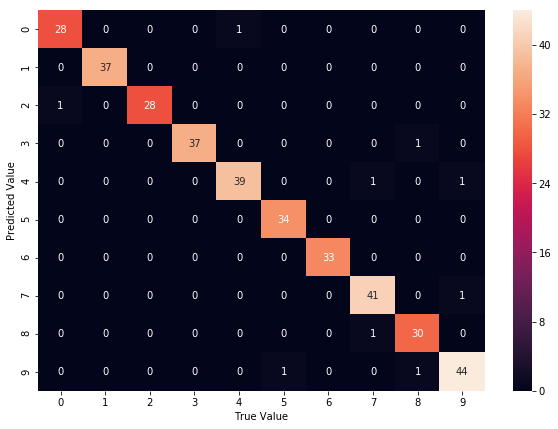

In [29]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

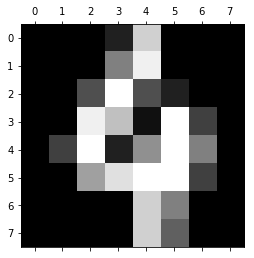

In [35]:
plt.matshow(digits.images[100])

In [36]:
digits.target[100]

4

In [37]:
model.predict([digits.data[100]])

array([4])